In [1]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:07<00:00, 20.6MB/s]
100% 149M/149M [00:07<00:00, 20.0MB/s]


In [2]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [3]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms,datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')


In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
train_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip()]
)

In [6]:
train_data=datasets.ImageFolder(root='/content/Training',transform=train_transform)
test_data=datasets.ImageFolder(root='/content/Testing',transform=train_transform)

In [7]:
num_of_classes=len(set(train_data.targets))

In [8]:
print(num_of_classes)

4


In [9]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True,num_workers=4)
test_loader=DataLoader(test_data,shuffle=False,batch_size=32,num_workers=4)

In [10]:
from torchvision.utils import make_grid

In [11]:
def imshow(img,label):
  plt.imshow(img.permute(1,2,0))
  plt.title(label)


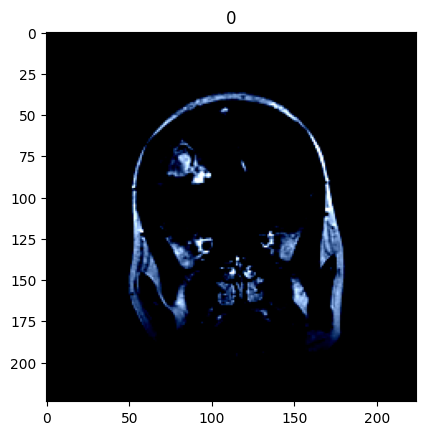

In [12]:
imshow(*train_data[0])

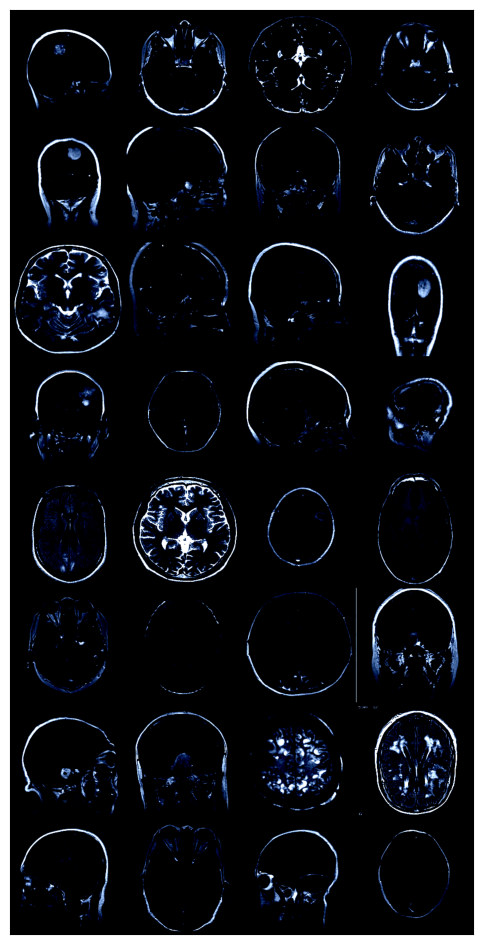

In [13]:
def show_batch(loader):
  for images,labels in loader:
    fig,ax=plt.subplots(figsize=(16,12))
    ax.imshow(make_grid(images,nrow=4).permute(1,2,0))
    ax.set_xticks([])
    ax.set_yticks([])
    break
show_batch(train_loader)

In [14]:
import timm
model = timm.create_model('convnext_large', pretrained=True)
in_features = model.num_features
model.head = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(in_features, 4)
)
model.to(device)
print(model)

model.safetensors:   0%|          | 0.00/791M [00:00<?, ?B/s]

ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=192, out_features=768, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (fc2): Linear(in_features=768, out_features=192, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), g

In [15]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

 20%|██        | 1/5 [14:10<56:41, 850.32s/it]

Epoch [1/5], Train Loss: 1.4702, Test Loss: 1.1773, Train Acc: 44.78%, Test Acc: 45.31%


 40%|████      | 2/5 [28:22<42:33, 851.32s/it]

Epoch [2/5], Train Loss: 1.1007, Test Loss: 1.1863, Train Acc: 46.43%, Test Acc: 46.07%


 60%|██████    | 3/5 [42:34<28:23, 851.81s/it]

Epoch [3/5], Train Loss: 0.7735, Test Loss: 0.7616, Train Acc: 74.07%, Test Acc: 69.41%


 80%|████████  | 4/5 [56:48<14:12, 852.68s/it]

Epoch [4/5], Train Loss: 0.5798, Test Loss: 0.5500, Train Acc: 82.93%, Test Acc: 76.51%


100%|██████████| 5/5 [1:11:02<00:00, 852.49s/it]

Epoch [5/5], Train Loss: 0.4270, Test Loss: 0.4384, Train Acc: 86.80%, Test Acc: 83.07%


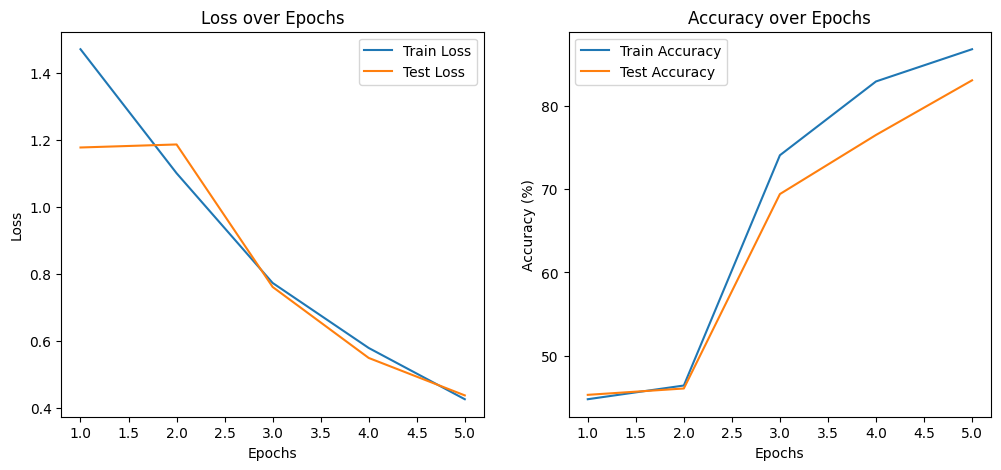

In [16]:
from tqdm import tqdm
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
num_epochs=5
# Function to calculate accuracy
def calculate_accuracy(loader, model):
    model.eval()  # Evaluation mode
    correct = total = 0
    with torch.no_grad():
        for images, labels in loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training and validation loop
for epoch in tqdm(range(num_epochs)):
    model.train()  # Training mode
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Calculate accuracy for train and test sets
    train_accuracy = calculate_accuracy(train_loader, model)
    test_accuracy = calculate_accuracy(test_loader, model)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate test loss
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, '
          f'Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

# Plot losses and accuracies
epochs = np.arange(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

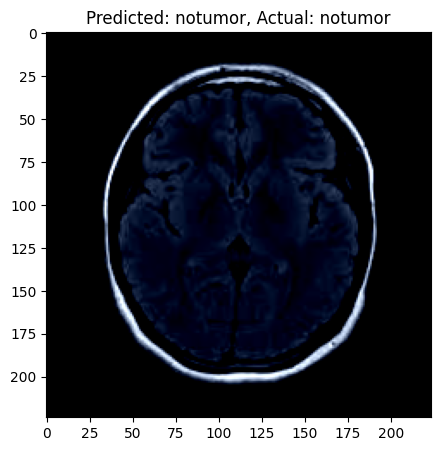

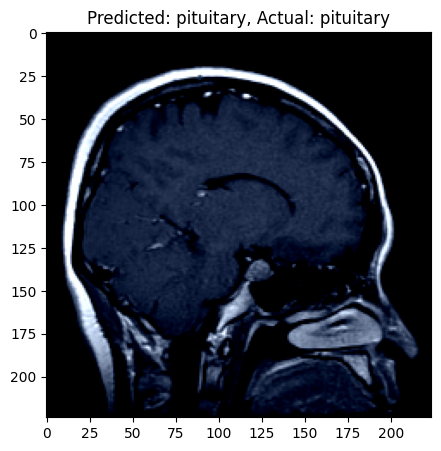

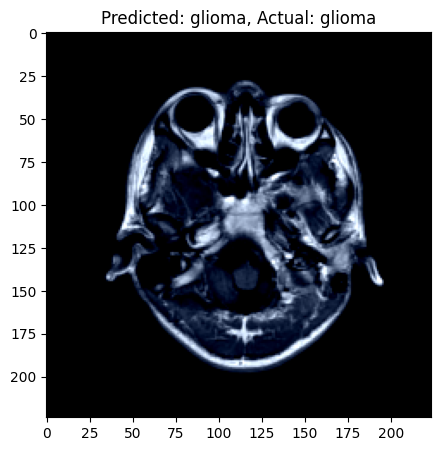

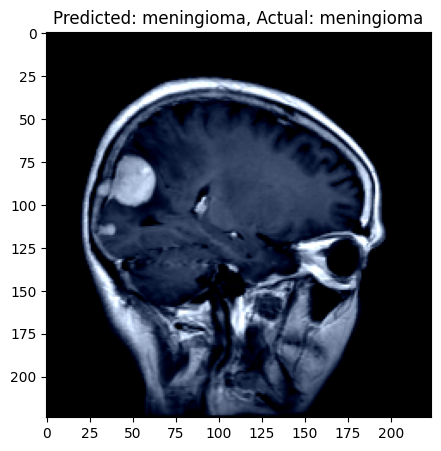

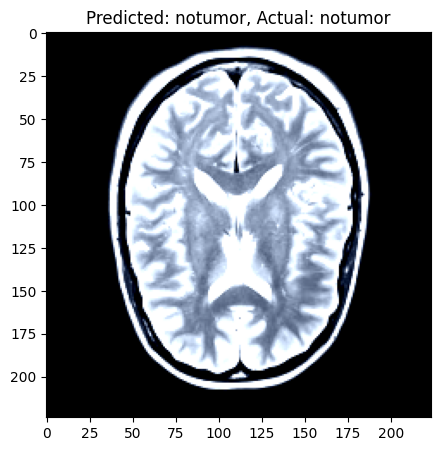

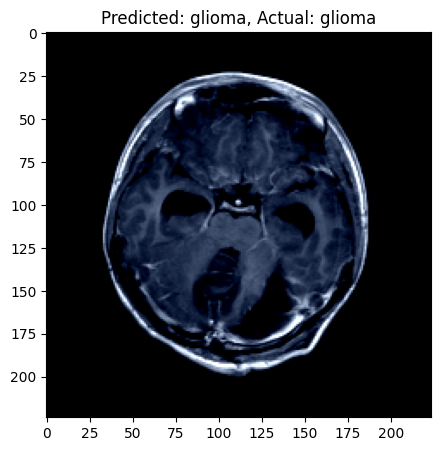

In [17]:

model.eval()

images, labels = next(iter(train_loader))
images = images.to('cuda' if torch.cuda.is_available() else 'cpu')
labels = labels.to('cuda' if torch.cuda.is_available() else 'cpu')

outputs = model(images)
_, preds = torch.max(outputs, 1)
def imshow(img, title=None):
    img = img /2+ .5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.show()
lists=["glioma","meningioma","notumor","pituitary"]

for i in range(6):
    plt.figure(figsize=(10, 5))
    p=preds[i]
    a=labels[i]
    imshow(images[i].cpu(), title=f"Predicted: {lists[p]}, Actual: {lists[a]}")
